In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter



# **1.   Data Overview**

In [38]:
# Load the TSV file
columns = [
    'ID',
    'label',
    'statement',
    'subjects',
    'speaker',
    'speaker_job_title',
    'state_info',
    'party_affiliation',
    'barely_true_counts',
    'false_counts',
    'half_true_counts',
    'mostly_true_counts',
    'pants_on_fire_counts',
    'context'
]

def load_data(file_path):
    try:
        data = pd.read_csv(file_path, sep='\t', names=columns)
        print(f"{file_path} loaded successfully!")
        return data
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return None

# Check data
def check_data(data):
    print("Data format info:\n",data.dtypes)
    print("Unique values in each column:\n", data.nunique())
    missing_values = data.isnull().sum()
    if missing_values.any():
        print("Missing values detected:")
        print(missing_values[missing_values > 0])

train_data = load_data('/content/drive/My Drive/cs7650project/train.tsv')
valid_data = load_data('/content/drive/My Drive/cs7650project/valid.tsv')
test_data = load_data('/content/drive/My Drive/cs7650project/test.tsv')

if train_data is not None:
    print("\nChecking training data:")
    print(train_data.info())
    check_data(train_data)

if valid_data is not None:
    print("\nChecking validation data:")
    print(valid_data.info())
    check_data(valid_data)

if test_data is not None:
    print("\nChecking test data:")
    print(test_data.info())
    check_data(test_data)


/content/drive/My Drive/cs7650project/train.tsv loaded successfully!
/content/drive/My Drive/cs7650project/valid.tsv loaded successfully!
/content/drive/My Drive/cs7650project/test.tsv loaded successfully!

Checking training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10240 non-null  object 
 1   label                 10240 non-null  object 
 2   statement             10240 non-null  object 
 3   subjects              10238 non-null  object 
 4   speaker               10238 non-null  object 
 5   speaker_job_title     7342 non-null   object 
 6   state_info            8030 non-null   object 
 7   party_affiliation     10238 non-null  object 
 8   barely_true_counts    10238 non-null  float64
 9   false_counts          10238 non-null  float64
 10  half_true_counts      10238 non-null  float

# **2. Data Cleaning**

In [39]:
def drop_unnecessary_columns(data):
    if data is None:
        print("Error: The input data is None.")
        return None

    columns_to_drop = [
        'ID',
        'speaker_job_title',
        'state_info',
        'party_affiliation',
        'barely_true_counts',
        'false_counts',
        'half_true_counts',
        'mostly_true_counts',
        'pants_on_fire_counts'
    ]

    # Ensure only columns that exist in the data are dropped
    columns_to_drop = [col for col in columns_to_drop if col in data.columns]

    if columns_to_drop:
        data = data.drop(columns=columns_to_drop)
    else:
        print("No columns to drop from the dataset.")

    # Drop duplicates
    data.drop_duplicates(inplace=True)

    # Drop missing values
    data.dropna(inplace=True)

    # Return cleaned data
    return data

# Drop the columns in train, valid, and test datasets
train_data_cleaned = drop_unnecessary_columns(train_data)
if train_data_cleaned is not None:
    print("Train data cleaned successfully!")

valid_data_cleaned = drop_unnecessary_columns(valid_data)
if valid_data_cleaned is not None:
    print("Validation data cleaned successfully!")

test_data_cleaned = drop_unnecessary_columns(test_data)
if test_data_cleaned is not None:
    print("Test data cleaned successfully!")


Train data cleaned successfully!
Validation data cleaned successfully!
Test data cleaned successfully!


# **3.Analyzing Categorical Variables**

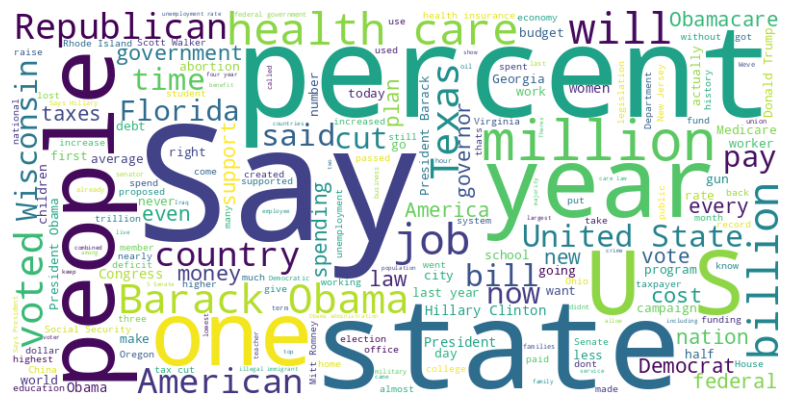

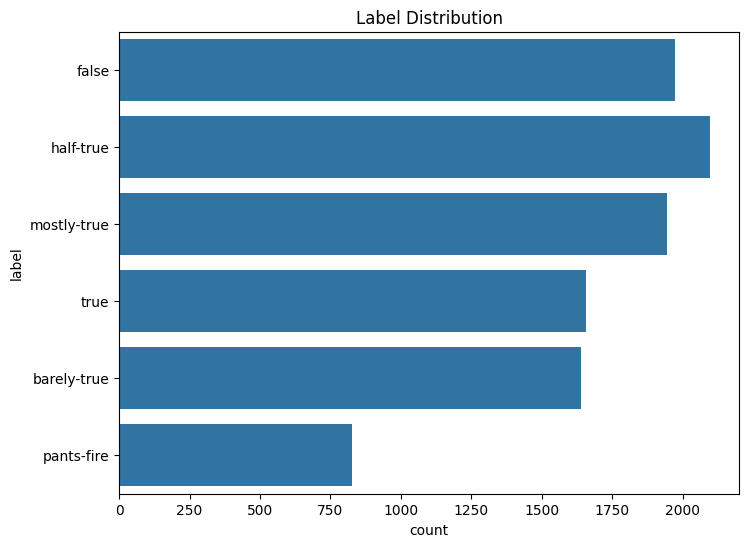

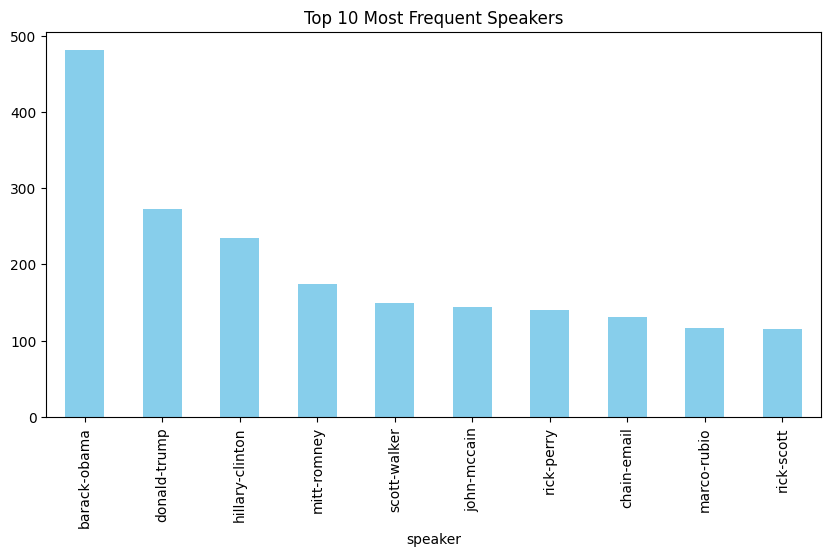

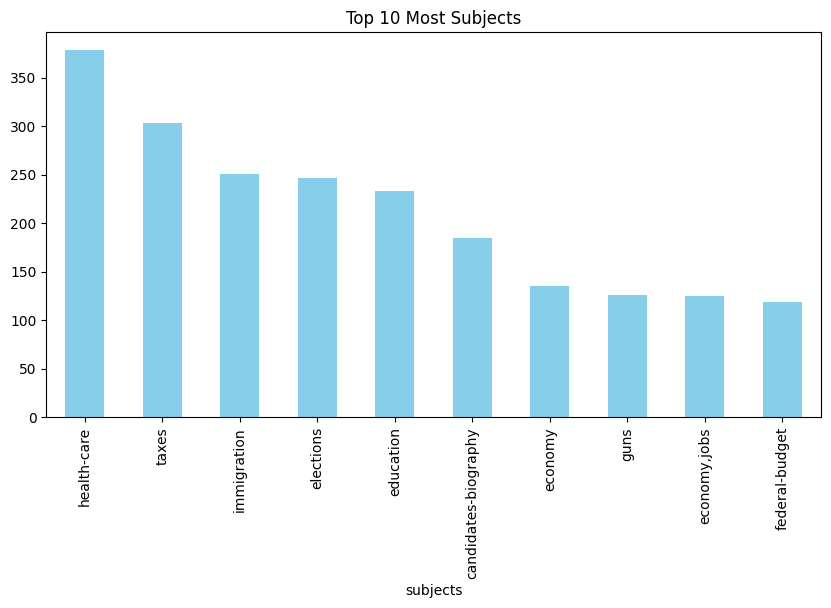

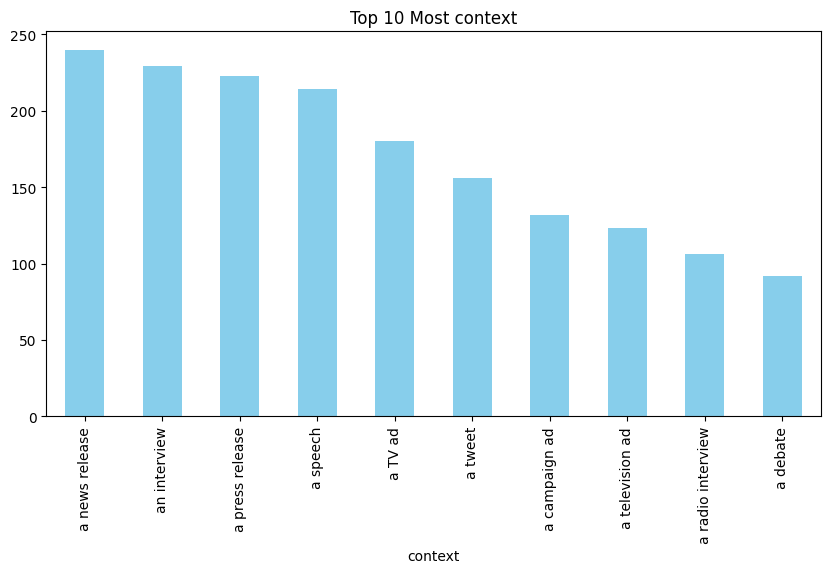

In [40]:
# Train Data
# Plot Word Cloud for Statements
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_data_cleaned['statement']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Label Distribution
plt.figure(figsize=(8, 6))
sns.countplot(train_data_cleaned['label'])
plt.title('Label Distribution')
plt.show()

#  Speaker Frequency
top_speakers = train_data_cleaned['speaker'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_speakers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Speakers')
plt.show()

# Subjects Distribution
top_subjects = train_data_cleaned['subjects'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_subjects.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Subjects')
plt.show()

# Context Distribution
top_context = train_data_cleaned['context'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_context.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most context')
plt.show()

# **4.Text Data Analysis**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


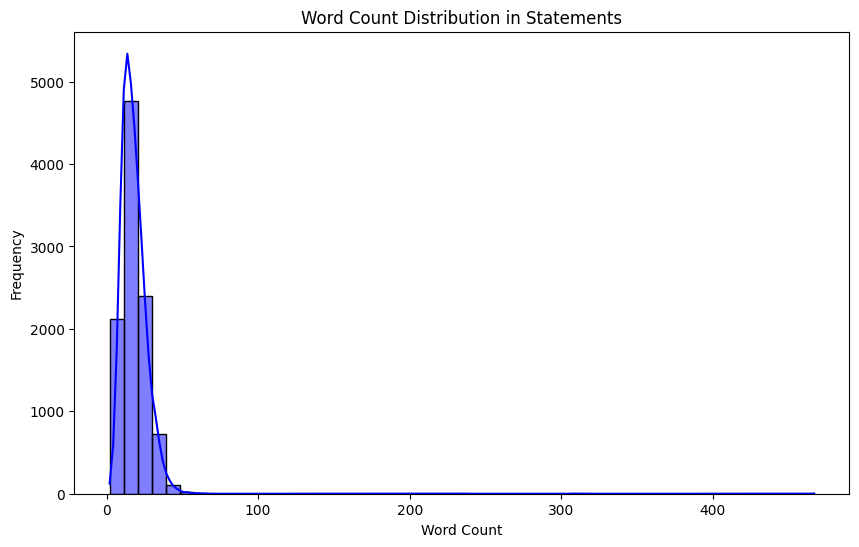

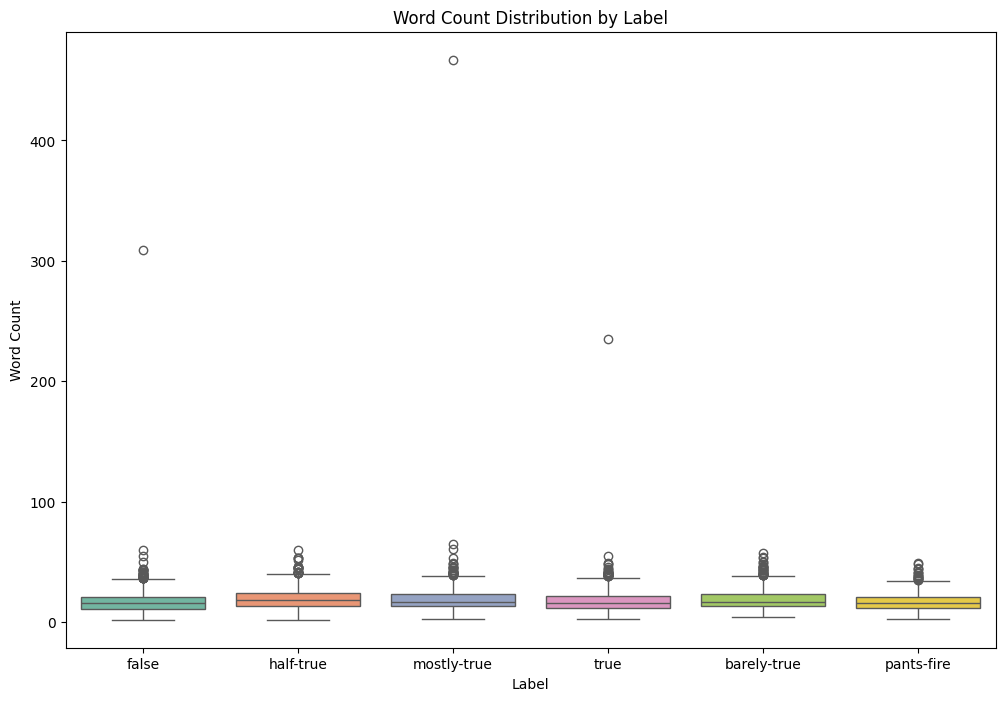

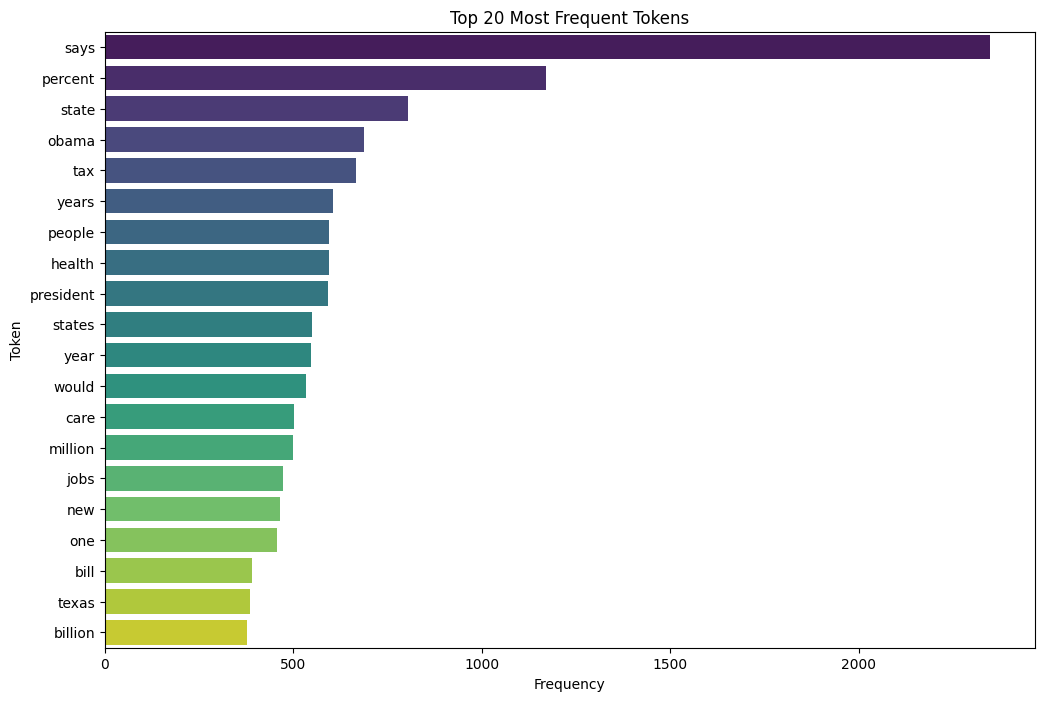

In [41]:
# Stopword
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Function to clean and tokenize text
def clean_text(text):
    tokens = text.lower().split()
    tokens = [word.strip(string.punctuation) for word in tokens]
    tokens = [word for word in tokens if word not in stop and word.isalpha()]
    return tokens

# Apply text cleaning
train_data_cleaned['tokens'] = train_data_cleaned['statement'].apply(clean_text)
valid_data_cleaned['tokens'] = valid_data_cleaned['statement'].apply(clean_text)
test_data_cleaned['tokens'] = test_data_cleaned['statement'].apply(clean_text)

# Calculate word counts and character counts
train_data_cleaned['word_count'] = train_data_cleaned['statement'].apply(lambda x: len(str(x).split()))
valid_data_cleaned['word_count'] = valid_data_cleaned['statement'].apply(lambda x: len(str(x).split()))
test_data_cleaned['word_count'] = test_data_cleaned['statement'].apply(lambda x: len(str(x).split()))

# Plot word count distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data_cleaned['word_count'], bins=50, kde=True, color='blue')
plt.title('Word Count Distribution in Statements')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Boxplot of word count by label
plt.figure(figsize=(12, 8))
sns.boxplot(x='label', y='word_count', data=train_data_cleaned, palette='Set2')
plt.title('Word Count Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Word Count')
plt.show()

# Plot Top 20 Most Frequent Tokens
all_tokens = [token for sublist in train_data_cleaned['tokens'] for token in sublist]
token_counts = Counter(all_tokens)
top_20_tokens = token_counts.most_common(20)
tokens, counts = zip(*top_20_tokens)

plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=tokens, palette='viridis')
plt.title('Top 20 Most Frequent Tokens')
plt.xlabel('Frequency')
plt.ylabel('Token')
plt.show()

In [42]:
train_data_cleaned = train_data_cleaned[train_data_cleaned['word_count'] <= 100]
valid_data_cleaned = valid_data_cleaned[valid_data_cleaned['word_count'] <= 100]
test_data_cleaned = test_data_cleaned[test_data_cleaned['word_count'] <= 100]

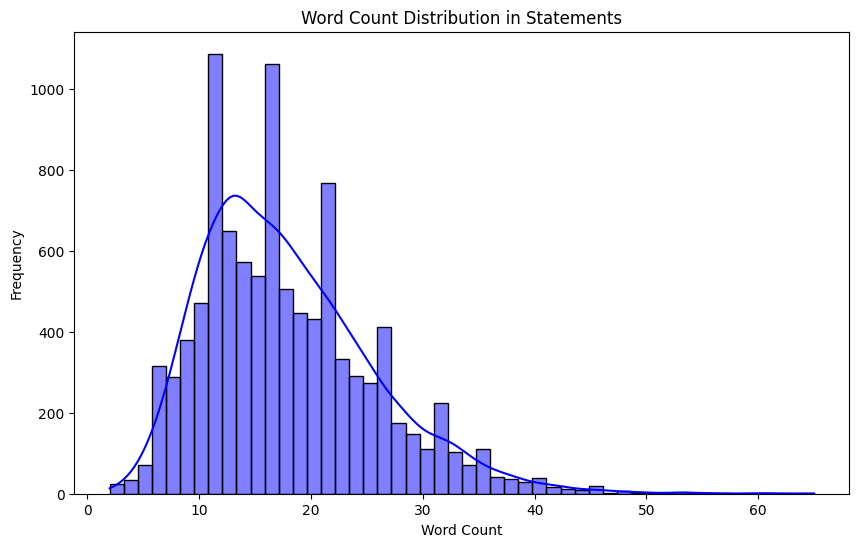

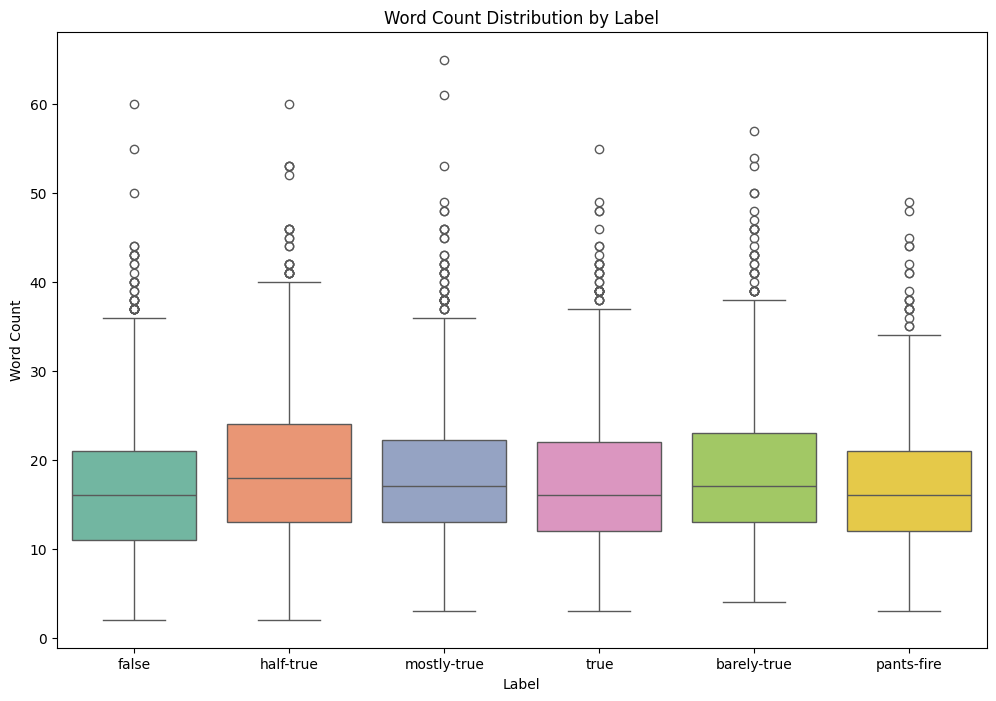

In [43]:
# Plot word count distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data_cleaned['word_count'], bins=50, kde=True, color='blue')
plt.title('Word Count Distribution in Statements')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Boxplot of word count by label
plt.figure(figsize=(12, 8))
sns.boxplot(x='label', y='word_count', data=train_data_cleaned, palette='Set2')
plt.title('Word Count Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Word Count')
plt.show()

# **5.TF-IDF**

In [44]:
# Get total text column for tf-idf
train_data_cleaned['text_total'] = train_data_cleaned[['statement', 'subjects', 'speaker', 'context']].apply(lambda x: ' '.join(x.astype(str)), axis=1)
valid_data_cleaned['text_total'] = valid_data_cleaned[['statement', 'subjects', 'speaker', 'context']].apply(lambda x: ' '.join(x.astype(str)), axis=1)
test_data_cleaned['text_total'] = test_data_cleaned[['statement', 'subjects', 'speaker', 'context']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

In [45]:
train_data_cleaned.head()

,label,statement,subjects,speaker,context,tokens,word_count,text_total
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,a mailer,"[says, annies, list, political, group, support...",11,Says the Annies List political group supports ...
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,a floor speech.,"[decline, coal, start, started, natural, gas, ...",24,When did the decline of coal start? It started...
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,Denver,"[hillary, clinton, agrees, john, mccain, votin...",19,"Hillary Clinton agrees with John McCain ""by vo..."
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,a news release,"[health, care, reform, legislation, likely, ma...",12,Health care reform legislation is likely to ma...
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,an interview on CNN,"[economic, turnaround, started, end, term]",10,The economic turnaround started at the end of ...


In [46]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

# train_data_cleaned
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
train_counts = count_vectorizer.fit_transform(train_data_cleaned['text_total'].values)
transformer = TfidfTransformer(smooth_idf=True)
tfidf_train = transformer.fit_transform(train_counts)
tfidf_train_df = pd.DataFrame(tfidf_train.toarray(), columns=count_vectorizer.get_feature_names_out())
print("TF-IDF Matrix Shape:", tfidf_train.shape)

# valid_data_cleaned
counts_valid = count_vectorizer.transform(valid_data_cleaned['text_total'].values)
tfidf_valid = transformer.transform(counts_valid)
tfidf_valid_df = pd.DataFrame(tfidf_valid.toarray(), columns=count_vectorizer.get_feature_names_out())

# test_data_cleaned
counts_test = count_vectorizer.transform(test_data_cleaned['text_total'].values)
tfidf_test = transformer.transform(counts_test)
tfidf_test_df = pd.DataFrame(tfidf_test.toarray(), columns=count_vectorizer.get_feature_names_out())

TF-IDF Matrix Shape: (10134, 109732)


In [47]:
train_data_cleaned.head()

,label,statement,subjects,speaker,context,tokens,word_count,text_total
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,a mailer,"[says, annies, list, political, group, support...",11,Says the Annies List political group supports ...
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,a floor speech.,"[decline, coal, start, started, natural, gas, ...",24,When did the decline of coal start? It started...
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,Denver,"[hillary, clinton, agrees, john, mccain, votin...",19,"Hillary Clinton agrees with John McCain ""by vo..."
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,a news release,"[health, care, reform, legislation, likely, ma...",12,Health care reform legislation is likely to ma...
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,an interview on CNN,"[economic, turnaround, started, end, term]",10,The economic turnaround started at the end of ...


In [48]:
valid_data_cleaned.head()

,label,statement,subjects,speaker,context,tokens,word_count,text_total
0,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,an interview with ABC17 News,"[less, americans, working]",10,We have less Americans working now than in the...
2,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,a U.S. Ways and Means hearing,"[says, organizations, parading, social, welfar...",32,Says Having organizations parading as being so...
3,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,an opinion article,"[says, nearly, half, oregons, children, poor]",8,Says nearly half of Oregons children are poor....
4,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,interview with CBS News,"[attacks, republicans, various, programs, econ...",33,On attacks by Republicans that various program...
5,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,"in an interview at gun shop in Hudson, N.H.","[says, armed, civilians, stop, mass, shootings...",22,Says when armed civilians stop mass shootings ...


In [49]:
test_data_cleaned.head()

,label,statement,subjects,speaker,context,tokens,word_count,text_total
0,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Radio interview,"[building, wall, border, take, literally, years]",11,Building a wall on the U.S.-Mexico border will...
1,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,a news conference,"[wisconsin, pace, double, number, layoffs, year]",12,Wisconsin is on pace to double the number of l...
2,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,comments on ABC's This Week.,"[says, john, mccain, done, nothing, help, vets]",10,Says John McCain has done nothing to help the ...
3,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,a radio show,"[suzanne, bonamici, supports, plan, cut, choic...",13,Suzanne Bonamici supports a plan that will cut...
4,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,a web video,"[asked, reporter, whether, hes, center, crimin...",23,When asked by a reporter whether hes at the ce...


In [15]:
print(train_counts)

  (0, 85730)	1
  (0, 7879)	1
  (0, 57416)	1
  (0, 73573)	1
  (0, 43122)	1
  (0, 95249)	1
  (0, 100866)	1
  (0, 4128)	1
  (0, 28039)	1
  (0, 3967)	1
  (0, 31592)	1
  (0, 12948)	1
  (0, 58902)	1
  (0, 85838)	1
  (0, 7880)	1
  (0, 57433)	1
  (0, 73597)	1
  (0, 43157)	1
  (0, 95300)	1
  (0, 100867)	1
  (0, 4139)	1
  (0, 28040)	1
  (0, 4010)	1
  (0, 31593)	1
  (0, 12949)	1
  :	:
  (10133, 21334)	1
  (10133, 94800)	1
  (10133, 93475)	1
  (10133, 61950)	1
  (10133, 78969)	1
  (10133, 28481)	1
  (10133, 97277)	1
  (10133, 33883)	1
  (10133, 94504)	1
  (10133, 59557)	1
  (10133, 21343)	1
  (10133, 5746)	1
  (10133, 59559)	1
  (10133, 97285)	1
  (10133, 103328)	1
  (10133, 94506)	1
  (10133, 57151)	1
  (10133, 78993)	1
  (10133, 103032)	1
  (10133, 21562)	1
  (10133, 54355)	1
  (10133, 33885)	1
  (10133, 94808)	1
  (10133, 103308)	1
  (10133, 93476)	1


In [ ]:
print(tfidf_train)

  (0, 3967)	0.11404712867783988
  (0, 4010)	0.2317386641353897
  (0, 4128)	0.15829638171397462
  (0, 4139)	0.22187969259853352
  (0, 7879)	0.22187969259853352
  (0, 7880)	0.22187969259853352
  (0, 12948)	0.2317386641353897
  (0, 12949)	0.2317386641353897
  (0, 28039)	0.18117659464528485
  (0, 28040)	0.22187969259853352
  (0, 31592)	0.22187969259853352
  (0, 31593)	0.2317386641353897
  (0, 43122)	0.14944648508298605
  (0, 43157)	0.22187969259853352
  (0, 57416)	0.16284847072954933
  (0, 57433)	0.2317386641353897
  (0, 58902)	0.1340794449057363
  (0, 73573)	0.13661698118220703
  (0, 73597)	0.22187969259853352
  (0, 85730)	0.06009298611416719
  (0, 85838)	0.2317386641353897
  (0, 95249)	0.14494470689776867
  (0, 95300)	0.2317386641353897
  (0, 100866)	0.22187969259853352
  (0, 100867)	0.22187969259853352
  :	:
  (10133, 54355)	0.17726395350594729
  (10133, 57063)	0.09864717867394632
  (10133, 57151)	0.17726395350594729
  (10133, 59557)	0.16972252627520817
  (10133, 59559)	0.17726395350594

# **6.Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

# Define the label mapping
label_map = {
    'true': 'True',
    'mostly-true': 'True',
    'half-true': 'True',
    'false': 'False',
    'barely-true': 'False',
    'pants-fire': 'False'
}

# Assign training and testing features
X_train = tfidf_train_df
X_test = tfidf_test_df

# Map the labels in the training and test sets
y_train_binary = train_data_cleaned['label'].map(label_map)
y_test_binary = test_data_cleaned['label'].map(label_map)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train_binary)

print('Accuracy of Logistic Regression on training set: {:.2f}'.format(logreg.score(X_train, y_train_binary)))
print('Accuracy of Logistic Regression on test set: {:.2f}'.format(logreg.score(X_test, y_test_binary)))

# Predictions and classification report
y_test_pred_binary = logreg.predict(X_test)
print(classification_report(y_test_binary, y_test_pred_binary))



Accuracy of Logistic Regression on training set: 0.87
Accuracy of Logistic Regression on test set: 0.64
              precision    recall  f1-score   support

       False       0.64      0.42      0.51       549
        True       0.64      0.81      0.72       700

    accuracy                           0.64      1249
   macro avg       0.64      0.62      0.61      1249
weighted avg       0.64      0.64      0.63      1249



# **7.SVM Model**

In [31]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.svm import LinearSVC  # Changed from SVC to LinearSVC for faster linear classification
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn.decomposition import TruncatedSVD


label_map = {
    'true': 'True',
    'mostly-true': 'True',
    'half-true': 'True',
    'false': 'False',
    'barely-true': 'False',
    'pants-fire': 'False'
}

train_data_cleaned['label'] = train_data_cleaned['label'].map(label_map)
valid_data_cleaned['label'] = valid_data_cleaned['label'].map(label_map)
test_data_cleaned['label'] = test_data_cleaned['label'].map(label_map)

# Count Vectorizer and TF-IDF transformation
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')

# Transform training data
train_counts = count_vectorizer.fit_transform(train_data_cleaned['text_total'].values)
transformer = TfidfTransformer(smooth_idf=True)
tfidf_train = transformer.fit_transform(train_counts)
tfidf_train_df = pd.DataFrame(tfidf_train.toarray(), columns=count_vectorizer.get_feature_names_out())
print("TF-IDF Matrix Shape:", tfidf_train.shape)

svd = TruncatedSVD(n_components=500)
tfidf_train_reduced = svd.fit_transform(tfidf_train)

# Transform validation data
counts_valid = count_vectorizer.transform(valid_data_cleaned['text_total'].values)
tfidf_valid = transformer.transform(counts_valid)
tfidf_valid_df = pd.DataFrame(tfidf_valid.toarray(), columns=count_vectorizer.get_feature_names_out())
tfidf_valid_reduced = svd.transform(tfidf_valid)

# Transform test data
counts_test = count_vectorizer.transform(test_data_cleaned['text_total'].values)
tfidf_test = transformer.transform(counts_test)
tfidf_test_df = pd.DataFrame(tfidf_test.toarray(), columns=count_vectorizer.get_feature_names_out())
tfidf_test_reduced = svd.transform(tfidf_test)


X_train = tfidf_train_reduced
y_train = train_data_cleaned['label']

X_test = tfidf_test_reduced
y_test = test_data_cleaned['label']


svm_model = LinearSVC(C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

train_accuracy = svm_model.score(X_train, y_train)
print(f'Accuracy of LinearSVC on training set: {train_accuracy:.2f}')

test_accuracy = svm_model.score(X_test, y_test)
print(f'Accuracy of LinearSVC on test set: {test_accuracy:.2f}')

y_test_pred = svm_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_test_pred))
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Overall test accuracy: {accuracy:.2f}")


TF-IDF Matrix Shape: (10134, 109732)
Accuracy of LinearSVC on training set: 0.67
Accuracy of LinearSVC on test set: 0.62
              precision    recall  f1-score   support

       False       0.60      0.44      0.51       549
        True       0.64      0.77      0.70       700

    accuracy                           0.62      1249
   macro avg       0.62      0.61      0.60      1249
weighted avg       0.62      0.62      0.61      1249

Overall test accuracy: 0.62


In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn.decomposition import TruncatedSVD

# Count Vectorizer and TF-IDF transformation
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')

# Transform training data
train_counts = count_vectorizer.fit_transform(train_data_cleaned['text_total'].values)
transformer = TfidfTransformer(smooth_idf=True)
tfidf_train = transformer.fit_transform(train_counts)
tfidf_train_df = pd.DataFrame(tfidf_train.toarray(), columns=count_vectorizer.get_feature_names_out())
print("TF-IDF Matrix Shape:", tfidf_train.shape)

# Optionally reduce dimensionality of the TF-IDF matrix to speed up training (using TruncatedSVD)
svd = TruncatedSVD(n_components=500)  # Reduce dimensions to 500 (or a suitable number)
tfidf_train_reduced = svd.fit_transform(tfidf_train)

# Transform validation data
counts_valid = count_vectorizer.transform(valid_data_cleaned['text_total'].values)
tfidf_valid = transformer.transform(counts_valid)
tfidf_valid_reduced = svd.transform(tfidf_valid)  # Apply dimensionality reduction

# Transform test data
counts_test = count_vectorizer.transform(test_data_cleaned['text_total'].values)
tfidf_test = transformer.transform(counts_test)
tfidf_test_reduced = svd.transform(tfidf_test)  # Apply dimensionality reduction

# Train SVM model with Sigmoid kernel
X_train = tfidf_train_reduced
y_train = train_data_cleaned['label']

X_test = tfidf_test_reduced
y_test = test_data_cleaned['label']


TF-IDF Matrix Shape: (10137, 110173)


In [ ]:
# Initialize SVM classifier with Sigmoid kernel
svm_model = SVC(kernel='sigmoid', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

train_accuracy = svm_model.score(X_train, y_train)
print(f'Accuracy of SVM (Sigmoid kernel) on training set: {train_accuracy:.2f}')

# Evaluate model performance on test data
test_accuracy = svm_model.score(X_test, y_test)
print(f'Accuracy of SVM (Sigmoid kernel) on test set: {test_accuracy:.2f}')

# Predict on test data
y_test_pred = svm_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_test_pred))
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Overall test accuracy: {accuracy:.2f}")

Accuracy of SVM (Sigmoid kernel) on training set: 0.27
Accuracy of SVM (Sigmoid kernel) on test set: 0.26
              precision    recall  f1-score   support

 barely-true       0.21      0.16      0.18       212
       false       0.26      0.33      0.29       246
   half-true       0.23      0.27      0.25       260
 mostly-true       0.26      0.29      0.27       238
  pants-fire       0.43      0.21      0.28        91
        true       0.31      0.24      0.27       203

    accuracy                           0.26      1250
   macro avg       0.28      0.25      0.26      1250
weighted avg       0.26      0.26      0.26      1250

Overall test accuracy: 0.26


# **8. Naive Bayes Classifier**

In [50]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD
import pandas as pd

# Define the label map
label_map = {
    'true': 'True',
    'mostly-true': 'True',
    'half-true': 'True',
    'false': 'False',
    'barely-true': 'False',
    'pants-fire': 'False'
}

# Map labels in the datasets
train_data_cleaned['label'] = train_data_cleaned['label'].map(label_map)
valid_data_cleaned['label'] = valid_data_cleaned['label'].map(label_map)
test_data_cleaned['label'] = test_data_cleaned['label'].map(label_map)

# Count Vectorizer and TF-IDF transformation
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', max_features=10000)

# Transform training data
train_counts = count_vectorizer.fit_transform(train_data_cleaned['text_total'].values)
transformer = TfidfTransformer(smooth_idf=True)
tfidf_train = transformer.fit_transform(train_counts)

# Optionally reduce dimensionality of the TF-IDF matrix to speed up training (using TruncatedSVD)
svd = TruncatedSVD(n_components=500, random_state=42)
tfidf_train_reduced = svd.fit_transform(tfidf_train)

# Apply MinMaxScaler to ensure non-negative values
scaler = MinMaxScaler()
X_train = scaler.fit_transform(tfidf_train_reduced)

# Transform validation data
counts_valid = count_vectorizer.transform(valid_data_cleaned['text_total'].values)
tfidf_valid = transformer.transform(counts_valid)
tfidf_valid_reduced = svd.transform(tfidf_valid)
X_valid = scaler.transform(tfidf_valid_reduced)

# Transform test data
counts_test = count_vectorizer.transform(test_data_cleaned['text_total'].values)
tfidf_test = transformer.transform(counts_test)
tfidf_test_reduced = svd.transform(tfidf_test)
X_test = scaler.transform(tfidf_test_reduced)

# Get labels for train and test sets
y_train = train_data_cleaned['label']
y_test = test_data_cleaned['label']

# Initialize Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Evaluate model performance on training data
train_accuracy = nb_model.score(X_train, y_train)
print(f'Accuracy of Naive Bayes on training set: {train_accuracy:.2f}')

# Evaluate model performance on test data
test_accuracy = nb_model.score(X_test, y_test)
print(f'Accuracy of Naive Bayes on test set: {test_accuracy:.2f}')

# Predict on test data
y_test_pred = nb_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_test_pred))
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Overall test accuracy: {accuracy:.2f}")


Accuracy of Naive Bayes on training set: 0.56
Accuracy of Naive Bayes on test set: 0.56
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       549
        True       0.56      1.00      0.72       700

    accuracy                           0.56      1249
   macro avg       0.28      0.50      0.36      1249
weighted avg       0.31      0.56      0.40      1249

Overall test accuracy: 0.56


# **9. Bert**

In [16]:
label_map = {
    'true': 'True',
    'mostly-true': 'True',
    'half-true': 'True',
    'false': 'False',
    'barely-true': 'False',
    'pants-fire': 'False'
}

In [29]:
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.metrics import classification_report
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=64):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(1 if label == 'True' else 0, dtype=torch.long)
        }

# load data
train_texts = train_data_cleaned['statement']
test_texts = test_data_cleaned['statement']
y_train_binary = train_data_cleaned['label'].map(label_map)
y_test_binary = test_data_cleaned['label'].map(label_map)

train_dataset = TextDataset(train_texts.tolist(), y_train_binary.tolist(), tokenizer)
test_dataset = TextDataset(test_texts.tolist(), y_test_binary.tolist(), tokenizer)

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=0.01,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to="none"
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        'accuracy': (preds == labels).mean(),
        'classification_report': classification_report(labels, preds, target_names=["False", "True"], output_dict=True)
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()
trainer.evaluate()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Classification Report
1,1.517200,3.658151,0.439552,"{'False': {'precision': 0.43955164131305047, 'recall': 1.0, 'f1-score': 0.610678531701891, 'support': 549.0}, 'True': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 700.0}, 'accuracy': 0.43955164131305047, 'macro avg': {'precision': 0.21977582065652523, 'recall': 0.5, 'f1-score': 0.3053392658509455, 'support': 1249.0}, 'weighted avg': {'precision': 0.19320564538099658, 'recall': 0.43955164131305047, 'f1-score': 0.2684247509242099, 'support': 1249.0}}"
2,0.980600,0.713698,0.560448,"{'False': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 549.0}, 'True': {'precision': 0.5604483586869495, 'recall': 1.0, 'f1-score': 0.7183170856849667, 'support': 700.0}, 'accuracy': 0.5604483586869495, 'macro avg': {'precision': 0.28022417934347477, 'recall': 0.5, 'f1-score': 0.35915854284248333, 'support': 1249.0}, 'weighted avg': {'precision': 0.3141023627548956, 'recall': 0.5604483586869495, 'f1-score': 0.40257963168893246, 'support': 1249.0}}"
3,0.862200,0.687967,0.560448,"{'False': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 549.0}, 'True': {'precision': 0.5604483586869495, 'recall': 1.0, 'f1-score': 0.7183170856849667, 'support': 700.0}, 'accuracy': 0.5604483586869495, 'macro avg': {'precision': 0.28022417934347477, 'recall': 0.5, 'f1-score': 0.35915854284248333, 'support': 1249.0}, 'weighted avg': {'precision': 0.3141023627548956, 'recall': 0.5604483586869495, 'f1-score': 0.40257963168893246, 'support': 1249.0}}"


{'eval_loss': 0.6879674196243286,
 'eval_accuracy': 0.5604483586869495,
 'eval_classification_report': {'False': {'precision': 0.0,
   'recall': 0.0,
   'f1-score': 0.0,
   'support': 549.0},
  'True': {'precision': 0.5604483586869495,
   'recall': 1.0,
   'f1-score': 0.7183170856849667,
   'support': 700.0},
  'accuracy': 0.5604483586869495,
  'macro avg': {'precision': 0.28022417934347477,
   'recall': 0.5,
   'f1-score': 0.35915854284248333,
   'support': 1249.0},
  'weighted avg': {'precision': 0.3141023627548956,
   'recall': 0.5604483586869495,
   'f1-score': 0.40257963168893246,
   'support': 1249.0}},
 'eval_runtime': 4.6312,
 'eval_samples_per_second': 269.69,
 'eval_steps_per_second': 33.9,
 'epoch': 3.0}

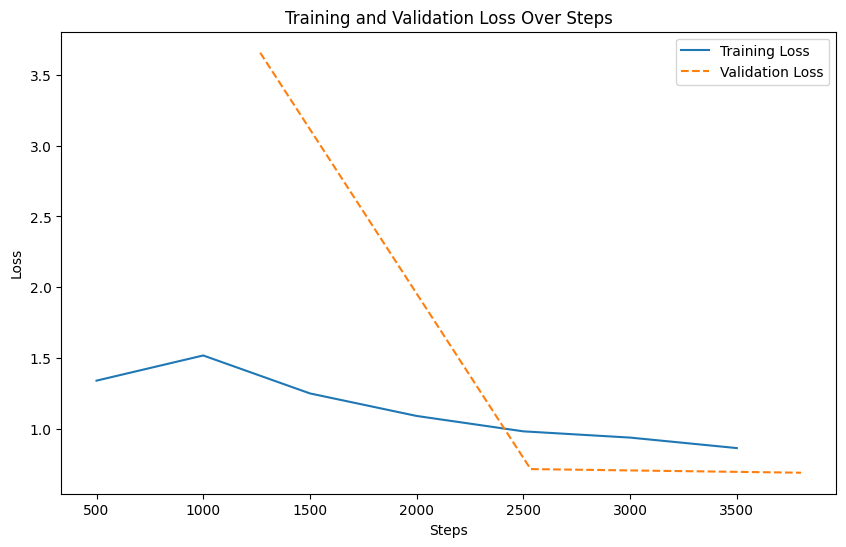

In [30]:
log_history = trainer.state.log_history

train_losses = [entry["loss"] for entry in log_history if "loss" in entry]
eval_losses = [entry["eval_loss"] for entry in log_history if "eval_loss" in entry]

train_steps = [entry["step"] for entry in log_history if "loss" in entry]
eval_steps = [entry["step"] for entry in log_history if "eval_loss" in entry]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_steps, train_losses, label="Training Loss")
plt.plot(eval_steps, eval_losses, label="Validation Loss", linestyle="--")
plt.title("Training and Validation Loss Over Steps")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.show()
